# USING NETWORK **LIBRARY**

Hub Scores:  {'A': 0.12917130661302928, 'B': 0.2583426132260586, 'C': 0.2583426132260586, 'E': 0.22497216032182413, 'D': 0.12917130661302928}
Authority Scores:  {'A': 0.4428026084897245, 'B': 0.0, 'C': 0.11439478302055076, 'E': 0.3284078254691738, 'D': 0.11439478302055084}


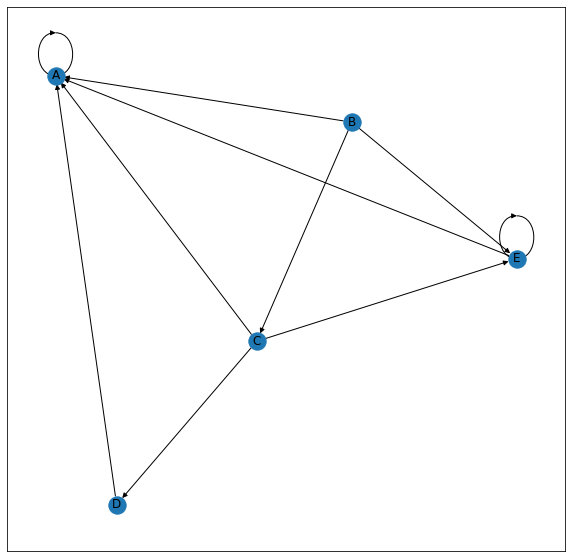

In [ ]:
# importing modules
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

G.add_edges_from([('A', 'A'), ('B', 'A'), ('B', 'C'), ('B', 'E'), ('C', 'A'), ('C', 'D'),('E', 'A'), ('E', 'E'),('C', 'E'), ('D', 'A')])

plt.figure(figsize =(10, 10))
nx.draw_networkx(G, with_labels = True)

hubs, authorities = nx.hits(G, max_iter = 50, normalized = True)
# The in-built hits function returns two dictionaries keyed by nodes
# containing hub scores and authority scores respectively.

print("Hub Scores: ", hubs)
print("Authority Scores: ", authorities)


# CUSTOM **IMPLIMENTATION**

In [ ]:
import numpy as np

# Function to calculate the authority and hub score of the nodes
def authority_hub_score(outlinks):
	"""
	Function to calculate the authority and hub score of all the nodes in the 
	network.
	
	Parameters:
	------------
	outlinks: (n, n) int matrix where 1 represents the presence of a link and 0
		represents absence of a link
	
	Returns:
	---------
	hub_score: nd-array, containing the hub scores of the nodes
	
	authority_score: nd-array, containing the authority scores of the nodes
	"""

	# size of the matrix
	size = outlinks.shape[0]

	# Initializing the lists
	hub_scores = [1.0 for i in range(size)]
	authority_scores = [1.0 for i in range(size)]

	# Printing initial Hub scores
	print(hub_scores)

	for _ in range(100):
		# Calculating the authority scores of the nodes
		for j in range(size):
			temp_auth = 0.0
			for i in range(size):
				if outlinks[i][j] == 1:
					temp_auth += hub_scores[i]
			authority_scores[j] = temp_auth

		# Normalizing the authority scores
		auth_sum = sum(authority_scores)
		# print(auth_sum)
		for i in range(len(authority_scores)):
			authority_scores[i] /= auth_sum

		# Calculating the hub scores of the nodes
		for i in range(size):
			temp_hub = 0.0
			for j in range(size):
				if outlinks[i][j] == 1:
					temp_hub += authority_scores[j]
			hub_scores[i] = temp_hub

		# Normalizing the hub scores
		hub_sum = sum(hub_scores)
		# print(hub_sum)
		for i in range(len(hub_scores)):
			hub_scores[i] /= hub_sum

	return authority_scores, hub_scores


n = int(input('Enter the size of the matrix:\t'))
outlinks = []
for i in range(n*n):
	temp = int(input('Enter the element:\t'))
	outlinks.append(temp)
outlinks = np.reshape(outlinks, (n, n))
authority_scores, hub_scores = authority_hub_score(outlinks)
print("Authority Scores:")
for i in (authority_scores):
	print(round(i, 4))
print("Hub Scores:")
for i in (hub_scores):
	print(round(i, 4))

Enter the size of the matrix:	5
Enter the element:	1
Enter the element:	0
Enter the element:	0
Enter the element:	0
Enter the element:	0
Enter the element:	1
Enter the element:	0
Enter the element:	1
Enter the element:	0
Enter the element:	1
Enter the element:	1
Enter the element:	0
Enter the element:	0
Enter the element:	1
Enter the element:	1
Enter the element:	1
Enter the element:	0
Enter the element:	0
Enter the element:	0
Enter the element:	0
Enter the element:	1
Enter the element:	0
Enter the element:	0
Enter the element:	0
Enter the element:	1
[1.0, 1.0, 1.0, 1.0, 1.0]
Authority Scores:
0.4428
0.0
0.1144
0.1144
0.3284
Hub Scores:
0.1292
0.2583
0.2583
0.1292
0.225
